<a href="https://colab.research.google.com/github/liyajun0804/ModelTranslate/blob/main/modelTranslate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


# 1. Inference

`detect.py` runs inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
YOLOv5 v4.0-65-ge9b3de4 torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

100% 14.1M/14.1M [00:00<00:00, 150MB/s]

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.033s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.017s)
Results saved to runs/detect/exp
Done. (0.235s)


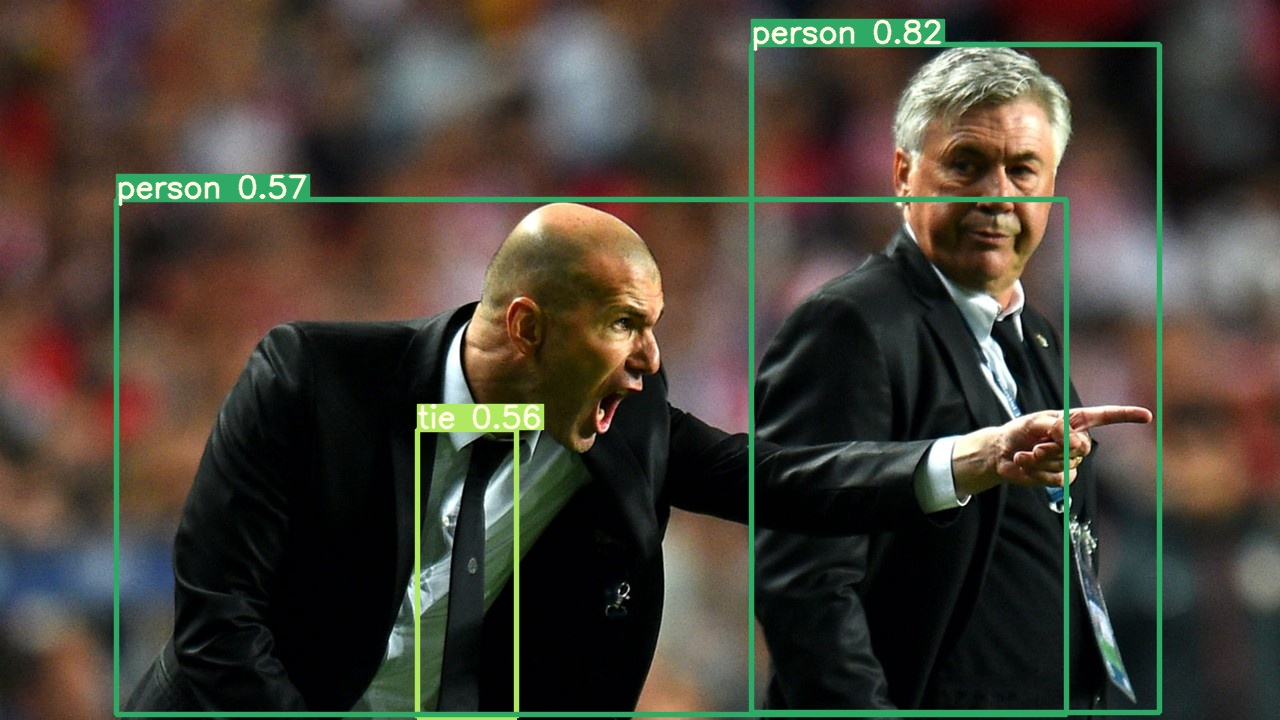

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [ ]:
!pip install onnx>=1.7.0  # for ONNX export
!pip install coremltools==4.0  # for CoreML export
!pip install onnx-simplifier

     |████████████████████████████████| 3.4MB 16.7MB/s 
  Created wheel for attr: filename=attr-0.3.1-cp36-none-any.whl size=2459 sha256=d27be0071cb75314b634201b5cdb9498e19b669f5faf2f1255459c37a52b4587
  Stored in directory: /root/.cache/pip/wheels/f0/96/9b/1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
Successfully built attr
     |████████████████████████████████| 471kB 19.0MB/s 
     |████████████████████████████████| 4.1MB 47.9MB/s 
  Created wheel for onnx-simplifier: filename=onnx_simplifier-0.3.0-cp36-none-any.whl size=8498 sha256=a2f3f078d93d36da0f02cf5015939b049797605a41eb84b9b8d93b4fa1ba52cc
  Stored in directory: /root/.cache/pip/wheels/62/bf/a8/817d1ce92bf3281e25df6c18f6c250c878820af9079fa28fb6
Successfully built onnx-simplifier


In [ ]:
%cd /content/yolov5/
!python models/export.py --weights /content/yolov5/weights/last1000.pt --img-size 416 416

/content/yolov5
Namespace(batch_size=1, img_size=[416, 416], weights='/content/yolov5/weights/last1000.pt')
Fusing layers... 
Model Summary: 308 layers, 21053802 parameters, 0 gradients, 201.4 GFLOPS

Starting TorchScript export with torch 1.7.0+cu101...
/usr/local/lib/python3.6/dist-packages/torch/jit/_trace.py:940: TracerWarning: Encountering a list at the output of the tracer might cause the trace to be incorrect, this is only valid if the container structure does not change based on the module's inputs. Consider using a constant container instead (e.g. for `list`, use a `tuple` instead. for `dict`, use a `NamedTuple` instead). If you absolutely need this and know the side effects, pass strict=False to trace() to allow this behavior.
  _force_outplace,
TorchScript export success, saved as /content/yolov5/weights/last1000.torchscript.pt

Starting ONNX export with onnx 1.8.1...
ONNX export success, saved as /content/yolov5/weights/last1000.onnx
scikit-learn version 0.22.2.post1 is not

In [ ]:
!python -m onnxsim /content/yolov5/weights/last1000.onnx /content/yolov5/weights/last1000simply.onnx

Simplifying...
Checking 0/3...
Checking 1/3...
Checking 2/3...
Ok!


In [ ]:
!sudo apt-get install autoconf automake libtool curl make g++ unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
curl is already the newest version (7.58.0-2ubuntu3.12).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
unzip is already the newest version (6.0-21ubuntu1.1).
The following additional packages will be installed:
  autotools-dev file libmagic-mgc libmagic1 libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext libtool-doc gcj-jdk
  m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev file libmagic-mgc libmagic1 libsigsegv2
  libtool m4
0 upgraded, 9 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,551 kB of archives.
After this operation, 10.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [18

In [ ]:
%cd ..

/content


In [ ]:
!git clone https://github.com/protocolbuffers/protobuf.git

Cloning into 'protobuf'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 78715 (delta 53), reused 68 (delta 25), pack-reused 78540
Receiving objects: 100% (78715/78715), 75.19 MiB | 26.15 MiB/s, done.
Resolving deltas: 100% (54480/54480), done.


In [ ]:
%cd /content/protobuf

/content/protobuf


In [ ]:
!git submodule update --init --recursive

Submodule 'third_party/benchmark' (https://github.com/google/benchmark.git) registered for path 'third_party/benchmark'
Submodule 'third_party/googletest' (https://github.com/google/googletest.git) registered for path 'third_party/googletest'
Cloning into '/content/protobuf/third_party/benchmark'...
Cloning into '/content/protobuf/third_party/googletest'...
Submodule path 'third_party/benchmark': checked out '5b7683f49e1e9223cf9927b24f6fd3d6bd82e3f8'
Submodule path 'third_party/googletest': checked out '5ec7f0c4a113e2f18ac2c6cc7df51ad6afc24081'


In [ ]:
!./autogen.sh

+ mkdir -p third_party/googletest/m4
+ autoreconf -f -i -Wall,no-obsolete
libtoolize: putting auxiliary files in AC_CONFIG_AUX_DIR, 'build-aux'.
libtoolize: copying file 'build-aux/ltmain.sh'
libtoolize: putting macros in AC_CONFIG_MACRO_DIRS, 'm4'.
libtoolize: copying file 'm4/libtool.m4'
libtoolize: copying file 'm4/ltoptions.m4'
libtoolize: copying file 'm4/ltsugar.m4'
libtoolize: copying file 'm4/ltversion.m4'
libtoolize: copying file 'm4/lt~obsolete.m4'
configure.ac:27: installing 'build-aux/compile'
configure.ac:30: installing 'build-aux/config.guess'
configure.ac:30: installing 'build-aux/config.sub'
configure.ac:24: installing 'build-aux/install-sh'
configure.ac:24: installing 'build-aux/missing'
Makefile.am: installing 'build-aux/depcomp'
parallel-tests: installing 'build-aux/test-driver'
libtoolize: putting auxiliary files in AC_CONFIG_AUX_DIR, 'build-aux'.
libtoolize: copying file 'build-aux/ltmain.sh'
libtoolize: Consider adding 'AC_CONFIG_MACRO_DIRS([m4])' to configure.ac,

In [ ]:
!./configure

checking whether to enable maintainer-specific portions of Makefiles... yes
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking target system type... x86_64-pc-linux-gnu
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking whether UID '0' is supported by ustar format... yes
checking whether GID '0' is supported by ustar format... yes
checking how to create a ustar tar archive... gnutar
checking whether make supports nested variables... (cached) yes
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for

In [ ]:
!make

make  all-recursive
make[1]: Entering directory '/content/protobuf'
Making all in .
make[2]: Entering directory '/content/protobuf'
make[2]: Leaving directory '/content/protobuf'
Making all in src
make[2]: Entering directory '/content/protobuf/src'
  CXX      google/protobuf/stubs/bytestream.lo
  CXX      google/protobuf/stubs/common.lo
  CXX      google/protobuf/stubs/int128.lo
  CXX      google/protobuf/io/io_win32.lo
  CXX      google/protobuf/stubs/status.lo
  CXX      google/protobuf/stubs/statusor.lo
  CXX      google/protobuf/stubs/stringpiece.lo
  CXX      google/protobuf/stubs/stringprintf.lo
  CXX      google/protobuf/stubs/structurally_valid.lo
  CXX      google/protobuf/stubs/strutil.lo
  CXX      google/protobuf/stubs/time.lo
  CXX      google/protobuf/any_lite.lo
  CXX      google/protobuf/arena.lo
  CXX      google/protobuf/arenastring.lo
  CXX      google/protobuf/extension_set.lo
  CXX      google/protobuf/generated_enum_util.lo
  CXX      google/protobuf/generated_mes

In [ ]:
!make check

Making check in .
make[1]: Entering directory '/content/protobuf'
make  check-local
make[2]: Entering directory '/content/protobuf'
Making lib/libgmock.a lib/libgmock_main.a in gmock
make[3]: Entering directory '/content/protobuf/third_party/googletest/googletest'
depbase=`echo src/gtest-all.lo | sed 's|[^/]*$|.deps/&|;s|\.lo$||'`;\
/bin/bash ./libtool  --tag=CXX   --mode=compile g++ -DHAVE_CONFIG_H -I. -I./build-aux  -I. -I./include  -pthread -DGTEST_HAS_PTHREAD=1 -g -std=c++11 -DNDEBUG -MT src/gtest-all.lo -MD -MP -MF $depbase.Tpo -c -o src/gtest-all.lo src/gtest-all.cc &&\
mv -f $depbase.Tpo $depbase.Plo
libtool: compile:  g++ -DHAVE_CONFIG_H -I. -I./build-aux -I. -I./include -pthread -DGTEST_HAS_PTHREAD=1 -g -std=c++11 -DNDEBUG -MT src/gtest-all.lo -MD -MP -MF src/.deps/gtest-all.Tpo -c src/gtest-all.cc  -fPIC -DPIC -o src/.libs/gtest-all.o
libtool: compile:  g++ -DHAVE_CONFIG_H -I. -I./build-aux -I. -I./include -pthread -DGTEST_HAS_PTHREAD=1 -g -std=c++11 -DNDEBUG -MT src/gtest-al

In [ ]:
!zip -r /content/protobufMakeCheck.zip /content/protobuf

流式输出内容被截断，只能显示最后 5000 行内容。
  adding: content/protobuf/php/src/Google/Protobuf/Internal/CodedOutputStream.php (deflated 68%)
  adding: content/protobuf/php/src/Google/Protobuf/Internal/DescriptorPool.php (deflated 72%)
  adding: content/protobuf/php/src/Google/Protobuf/Internal/OneofDescriptorProto.php (deflated 75%)
  adding: content/protobuf/php/src/Google/Protobuf/Internal/EnumBuilderContext.php (deflated 53%)
  adding: content/protobuf/php/src/Google/Protobuf/Internal/MessageBuilderContext.php (deflated 63%)
  adding: content/protobuf/php/src/Google/Protobuf/Internal/FieldDescriptorProto.php (deflated 87%)
  adding: content/protobuf/php/src/Google/Protobuf/Internal/DescriptorProto/ (stored 0%)
  adding: content/protobuf/php/src/Google/Protobuf/Internal/DescriptorProto/ExtensionRange.php (deflated 79%)
  adding: content/protobuf/php/src/Google/Protobuf/Internal/DescriptorProto/ReservedRange.php (deflated 73%)
  adding: content/protobuf/php/src/Google/Protobuf/Internal/EnumDescriptorP

In [ ]:
!sudo make install

Making install in .
make[1]: Entering directory '/content/protobuf'
make[2]: Entering directory '/content/protobuf'
make[2]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/pkgconfig'
 /usr/bin/install -c -m 644 protobuf.pc protobuf-lite.pc '/usr/local/lib/pkgconfig'
make[2]: Leaving directory '/content/protobuf'
make[1]: Leaving directory '/content/protobuf'
Making install in src
make[1]: Entering directory '/content/protobuf/src'
make[2]: Entering directory '/content/protobuf/src'
 /bin/mkdir -p '/usr/local/lib'
 /bin/bash ../libtool   --mode=install /usr/bin/install -c   libprotobuf-lite.la libprotobuf.la libprotoc.la '/usr/local/lib'
libtool: install: /usr/bin/install -c .libs/libprotobuf-lite.so.25.0.0 /usr/local/lib/libprotobuf-lite.so.25.0.0
libtool: install: (cd /usr/local/lib && { ln -s -f libprotobuf-lite.so.25.0.0 libprotobuf-lite.so.25 || { rm -f libprotobuf-lite.so.25 && ln -s libprotobuf-lite.so.25.0.0 libprotobuf-lite.so.25; }; })
libtool: instal

In [ ]:
!sudo ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
%cd /content
!git clone https://github.com/Tencent/ncnn.git
%cd /content/ncnn
!mkdir -p build
%cd /content/ncnn/build
!cmake -DNCNN_VULKAN=OFF ..  #vulkan是针对gpu的，如果想要ncnn能调用gpu做推理，那么选项需要打开，设置为ON。
!make -j4  #开始编译

/content
Cloning into 'ncnn'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 18629 (delta 26), reused 25 (delta 13), pack-reused 18581
Receiving objects: 100% (18629/18629), 13.62 MiB | 29.49 MiB/s, done.
Resolving deltas: 100% (15516/15516), done.
/content/ncnn
/content/ncnn/build
-- CMAKE_INSTALL_PREFIX = /content/ncnn/build/install
-- NCNN_VERSION_STRING = 1.0.20210206
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- 

In [ ]:
%cd /content/
!zip -r ncnn.zip /content/ncnn

/content
  adding: content/ncnn/ (stored 0%)
  adding: content/ncnn/.astylerc (deflated 51%)
  adding: content/ncnn/glslang/ (stored 0%)
  adding: content/ncnn/toolchains/ (stored 0%)
  adding: content/ncnn/toolchains/arm-linux-gnueabi.toolchain.cmake (deflated 57%)
  adding: content/ncnn/toolchains/himix100.toolchain.cmake (deflated 57%)
  adding: content/ncnn/toolchains/iosxc-arm64.toolchain.cmake (deflated 55%)
  adding: content/ncnn/toolchains/powerpc64le-linux-gnu.toolchain.cmake (deflated 58%)
  adding: content/ncnn/toolchains/mipsel-linux-gnu.toolchain.cmake (deflated 57%)
  adding: content/ncnn/toolchains/pi3.toolchain.cmake (deflated 34%)
  adding: content/ncnn/toolchains/aarch64-linux-gnu-c.toolchain.cmake (deflated 55%)
  adding: content/ncnn/toolchains/ios.toolchain.cmake (deflated 71%)
  adding: content/ncnn/toolchains/riscv32-unknown-elf.toolchain.cmake (deflated 56%)
  adding: content/ncnn/toolchains/mipsisa32r6el-linux-gnu.toolchain.cmake (deflated 57%)
  adding: conten

In [ ]:
%cd /content/ncnn/build/tools/onnx/
!./onnx2ncnn /content/yolov5/weights/last1000simply.onnx /content/yolov5/weights/last1000simply.param /content/yolov5/weights/last1000simply.bin

/content/ncnn/build/tools/onnx


In [ ]:
%cd /content/

/content


In [ ]:
!zip -r models1000.zip /content/yolov5/weights/

  adding: content/yolov5/weights/ (stored 0%)
  adding: content/yolov5/weights/last1000.pt (deflated 8%)
  adding: content/yolov5/weights/last1000.torchscript.pt (deflated 17%)
  adding: content/yolov5/weights/last1000simply.param (deflated 86%)
  adding: content/yolov5/weights/last1000simply.onnx (deflated 16%)
  adding: content/yolov5/weights/last1000.onnx (deflated 16%)
  adding: content/yolov5/weights/download_weights.sh (deflated 28%)
  adding: content/yolov5/weights/last1000simply.bin (deflated 16%)
  adding: content/yolov5/weights/.ipynb_checkpoints/ (stored 0%)


In [ ]:
%cd /content/
!git clone https://github.com/cmdbug/YOLOv5_NCNN.git

In [ ]:
!zip -r YOLOv5_NCNN.zip /content/YOLOv5_NCNN/